In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns  # seabornをインポートする
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# from google.colab import drive

# Google Driveをマウントする
# drive.mount('/content/drive')

# ファイルパスを指定してデータを読み込む
file_amat = './amat.us.csv'
file_txn = './txn.us.csv'
data_a = pd.read_csv(file_amat)
data_t = pd.read_csv(file_txn)
# データの先頭行を確認する
print(data_a.head())
print(data_t.head())

         Date     Open     High      Low    Close    Volume  OpenInt
0  1984-09-07  0.23344  0.23344  0.23344  0.23344   4632005        0
1  1984-09-10  0.23344  0.23344  0.23344  0.23344   8953233        0
2  1984-09-11  0.23344  0.24215  0.23344  0.23344  14635943        0
3  1984-09-12  0.24215  0.24215  0.24215  0.24215  24965462        0
4  1984-09-13  0.24215  0.24215  0.24215  0.24215   4558011        0
         Date    Open    High     Low   Close   Volume  OpenInt
0  1981-12-31  1.0879  1.1050  1.0795  1.0795   859439        0
1  1982-01-04  1.0879  1.0879  1.0795  1.0879  1559519        0
2  1982-01-05  1.0711  1.0879  1.0543  1.0543  4519177        0
3  1982-01-06  1.0374  1.0543  1.0203  1.0288  5065576        0
4  1982-01-07  1.0203  1.0288  1.0121  1.0203  4006929        0


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


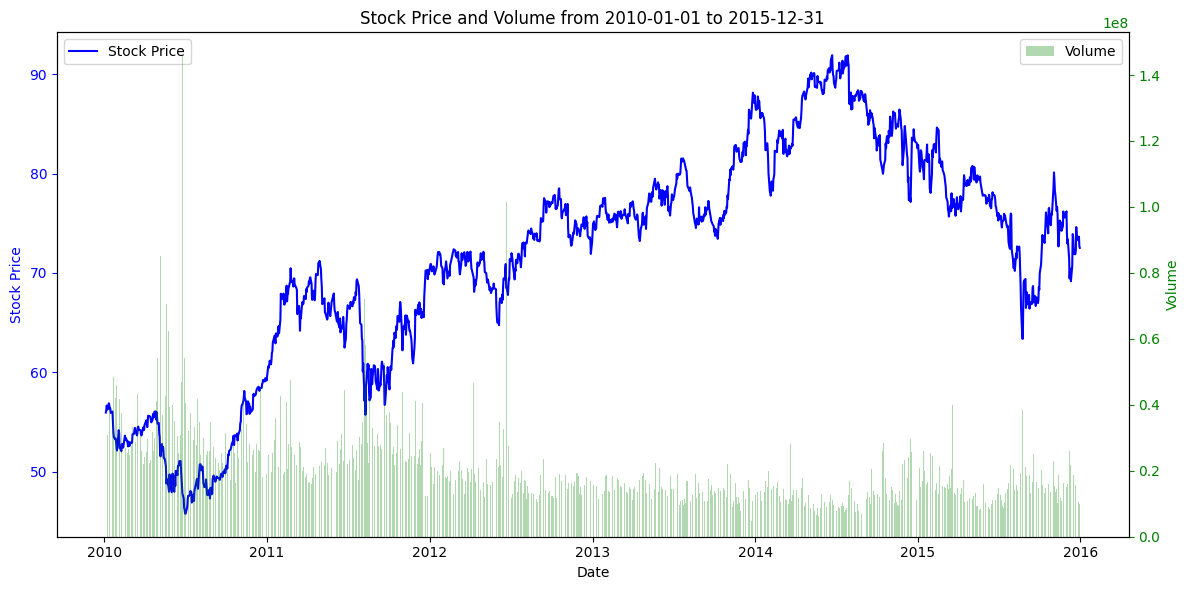

In [17]:
# 日付をdatetime型に変換する
data['Date'] = pd.to_datetime(data['Date'])

# 指定されたトレーニング期間のデータを抽出する
start_date = '2010-01-01'
end_date = '2015-12-31'
training_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

# 日付と終値の列を選択する
dates = training_data['Date']
prices = training_data['Close']
volumes = training_data['Volume']

# グラフを作成する（2つのy軸を持つ）
fig, ax1 = plt.subplots(figsize=(12, 6))

# 株価をプロットする
ax1.plot(dates, prices, linestyle='-', color='b', label='Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(loc='upper left')

# 2つ目のy軸を追加して取引量をプロットする
ax2 = ax1.twinx()
ax2.bar(dates, volumes, color='g', alpha=0.3, label='Volume')  # alphaで透明度を設定する
ax2.set_ylabel('Volume', color='g')
ax2.tick_params('y', colors='g')
ax2.legend(loc='upper right')

# グラフにタイトルを追加する
plt.title('Stock Price and Volume from 2010-01-01 to 2015-12-31')

# x軸のラベルを45度回転して表示
plt.xticks(rotation=45)

# グラフを表示する
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


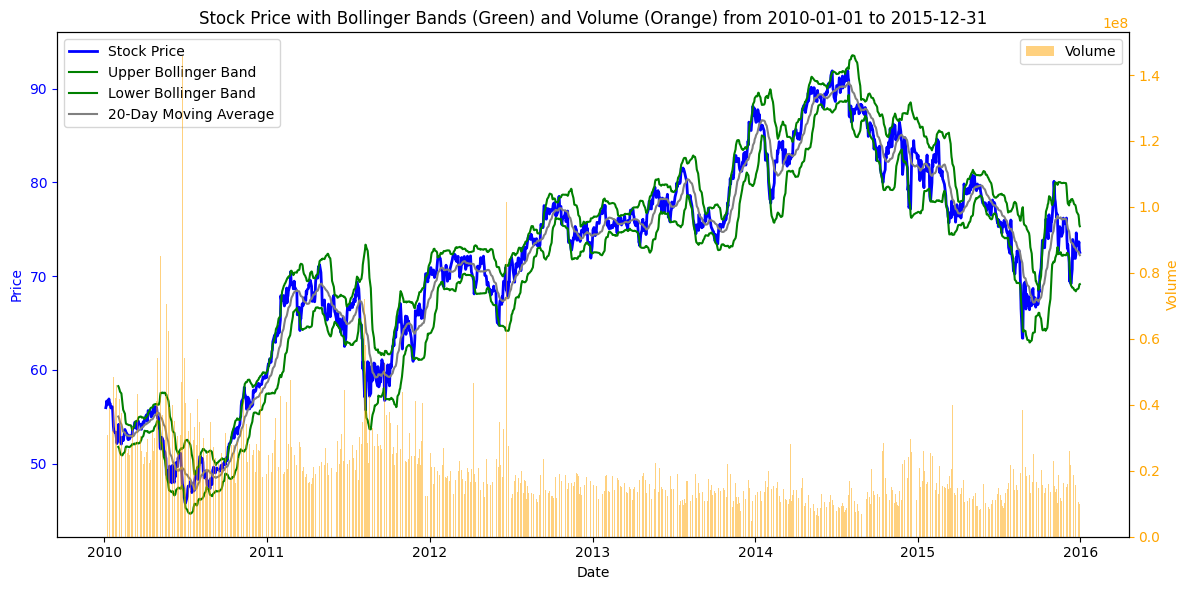

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Google Driveをマウントする
drive.mount('/content/drive')

# CSVファイルを読み込む
file_path = '/content/xom.us.csv'  # ファイルパスを適切に設定する
data = pd.read_csv(file_path)

# 日付をdatetime型に変換する
data['Date'] = pd.to_datetime(data['Date'])

# 指定されたトレーニング期間のデータを抽出する
start_date = '2010-01-01'
end_date = '2015-12-31'
training_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

# 日付と終値の列を選択する
dates = training_data['Date']
prices = training_data['Close']

# 移動平均と標準偏差を計算する
window_size = 20
rolling_mean = prices.rolling(window=window_size).mean()
rolling_std = prices.rolling(window=window_size).std()

# ボリンジャーバンドの上限と下限を計算する
upper_band = rolling_mean + 2 * rolling_std
lower_band = rolling_mean - 2 * rolling_std

# グラフを作成する（2つのy軸を持つ）
fig, ax1 = plt.subplots(figsize=(12, 6))

# 株価をプロットする（線の太さを変更）
ax1.plot(dates, prices, linestyle='-', linewidth=2, color='b', label='Stock Price')  # 線の太さを2に変更

# ボリンジャーバンドの上限と下限を緑色の実線で表示
ax1.plot(dates, upper_band, linestyle='-', color='green', label='Upper Bollinger Band')
ax1.plot(dates, lower_band, linestyle='-', color='green', label='Lower Bollinger Band')

# 中央線をグレーの実線で表示
ax1.plot(dates, rolling_mean, linestyle='-', color='gray', label='20-Day Moving Average')  # グレーに変更

# 2つ目のy軸を追加して取引量をプロットする（オレンジ色のバー）
ax2 = ax1.twinx()
ax2.bar(dates, training_data['Volume'], color='orange', alpha=0.5, label='Volume')

# 軸とラベルの設定
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='b')
ax1.tick_params('y', colors='b')
ax2.set_ylabel('Volume', color='orange')
ax2.tick_params('y', colors='orange')

# 凡例を追加
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# グラフにタイトルを追加する
plt.title('Stock Price with Bollinger Bands (Green) and Volume (Orange) from 2010-01-01 to 2015-12-31')

# x軸のラベルを45度回転して表示
plt.xticks(rotation=45)

# グラフを表示する
plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2010-01-04  79.629997  81.680000  79.629997  81.510002  81.510002  263542
2010-01-05  81.629997  82.000000  80.949997  81.769997  81.769997  258887
2010-01-06  81.430000  83.519997  80.849998  83.180000  83.180000  370059
2010-01-07  83.199997  83.360001  82.260002  82.660004  82.660004  246632
2010-01-08  82.650002  83.470001  81.800003  82.750000  82.750000  310377


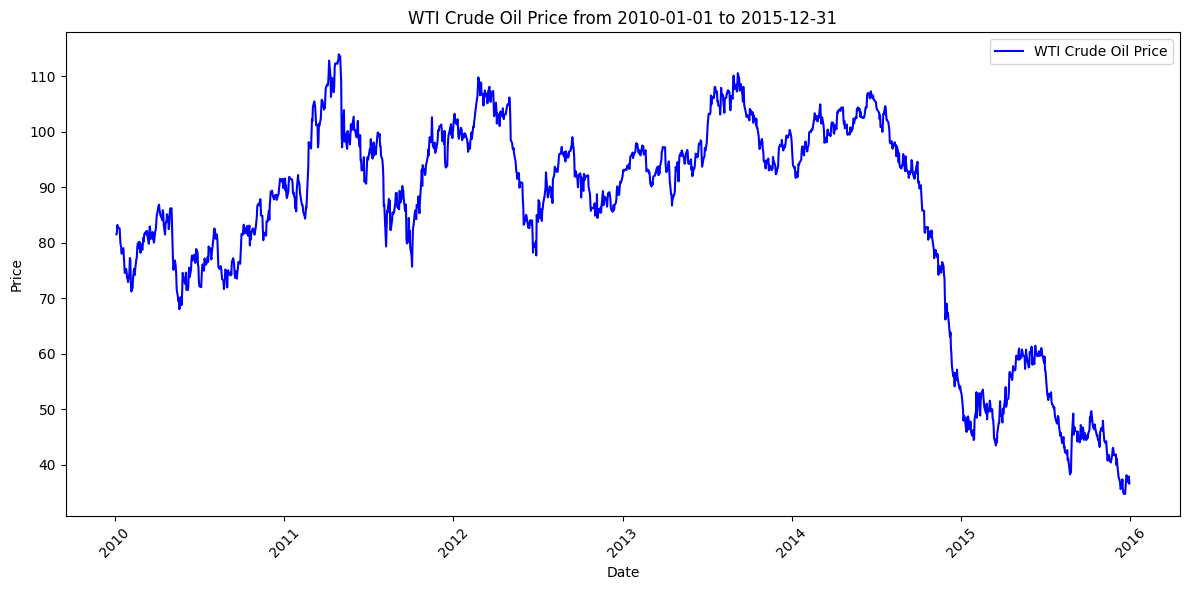

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# WTIの原油価格データを取得する
ticker = 'CL=F'  # CL=FはYahoo FinanceでのWTI原油先物のTicker
wti_data = yf.download(ticker, start='2010-01-01', end='2015-12-31')

# データの確認
print(wti_data.head())

# 日付と終値の列を選択する
dates = wti_data.index
prices = wti_data['Close']

# グラフを作成する
plt.figure(figsize=(12, 6))
plt.plot(dates, prices, linestyle='-', color='b', label='WTI Crude Oil Price')

# グラフにタイトルと軸ラベルを追加する
plt.title('WTI Crude Oil Price from 2010-01-01 to 2015-12-31')
plt.xlabel('Date')
plt.ylabel('Price')

# 凡例を追加する
plt.legend()

# x軸のラベルを45度回転して表示
plt.xticks(rotation=45)

# グラフを表示する
plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


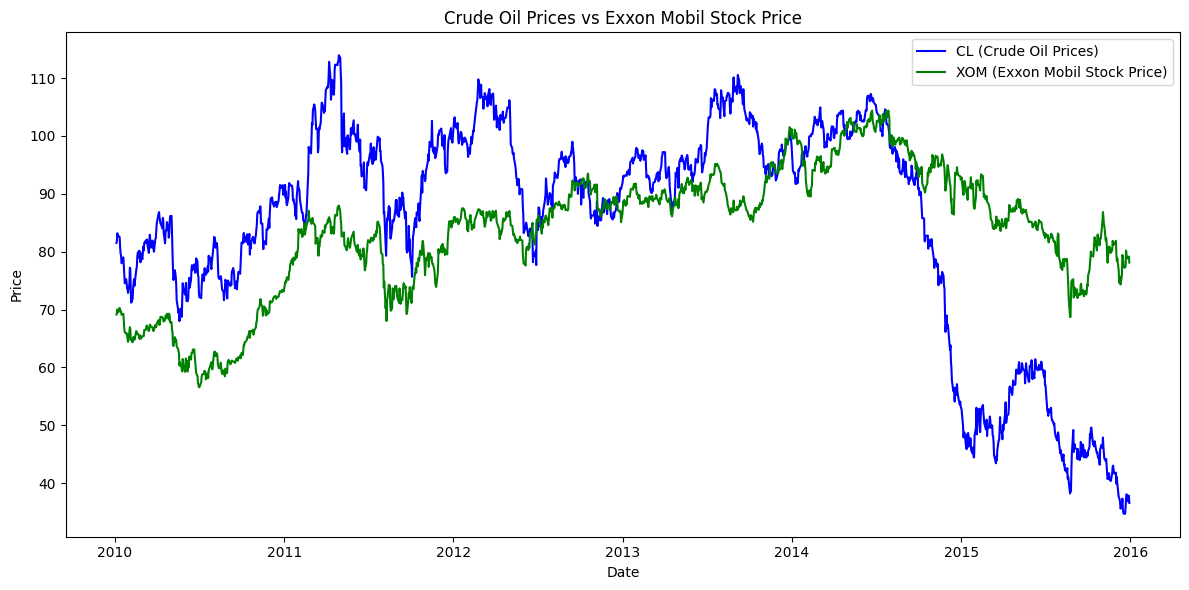

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf  # Yahoo Financeからデータを取得するためのライブラリ

# データを取得するための関数
def get_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Close']

# CLの原油価格データを取得
cl_data = get_data('CL=F', '2010-01-01', '2015-12-31')

# XOMの株価データを取得（同じ期間にする）
xom_data = get_data('XOM', '2010-01-01', '2015-12-31')

# グラフを作成
plt.figure(figsize=(12, 6))

# CLのチャート
plt.plot(cl_data.index, cl_data.values, color='b', label='CL (Crude Oil Prices)')

# XOMのチャート
plt.plot(xom_data.index, xom_data.values, color='g', label='XOM (Exxon Mobil Stock Price)')

# グラフのタイトルと軸ラベル
plt.title('Crude Oil Prices vs Exxon Mobil Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')

# 凡例を追加
plt.legend()

# グリッドを非表示にする
plt.grid(False)

# グラフを表示
plt.tight_layout()
plt.show()


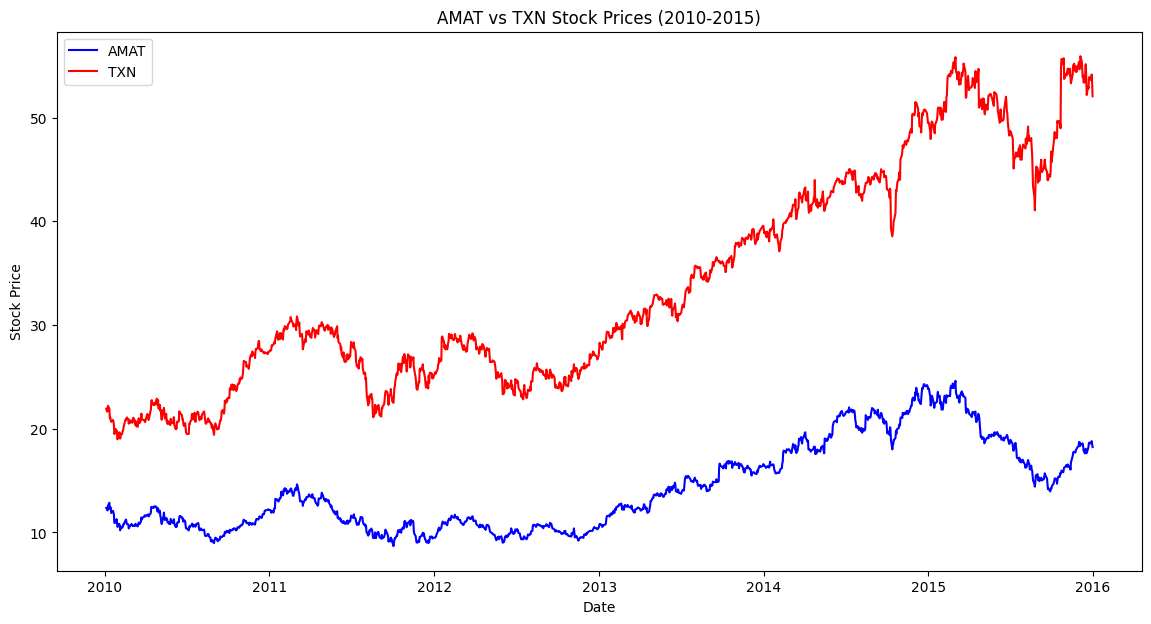

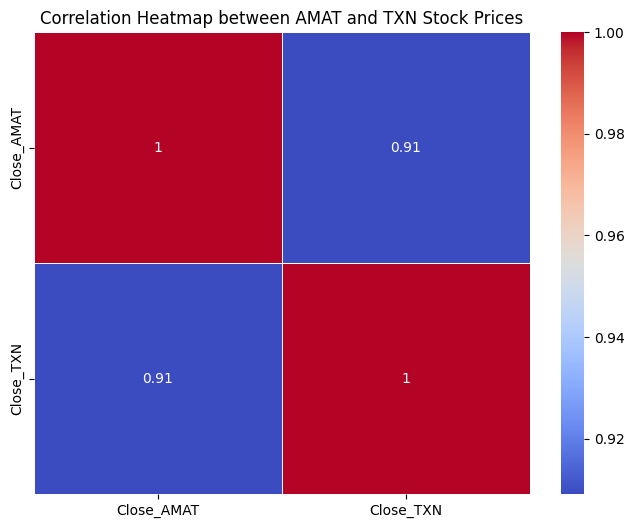

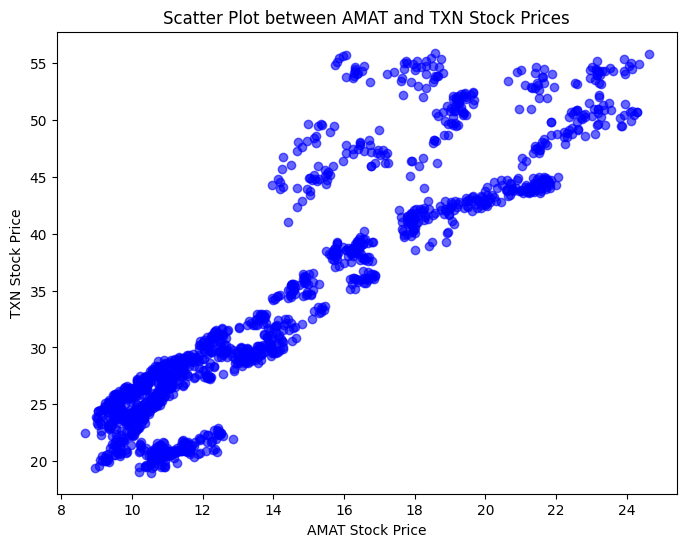

Mean Squared Error: 1.1396136159000059


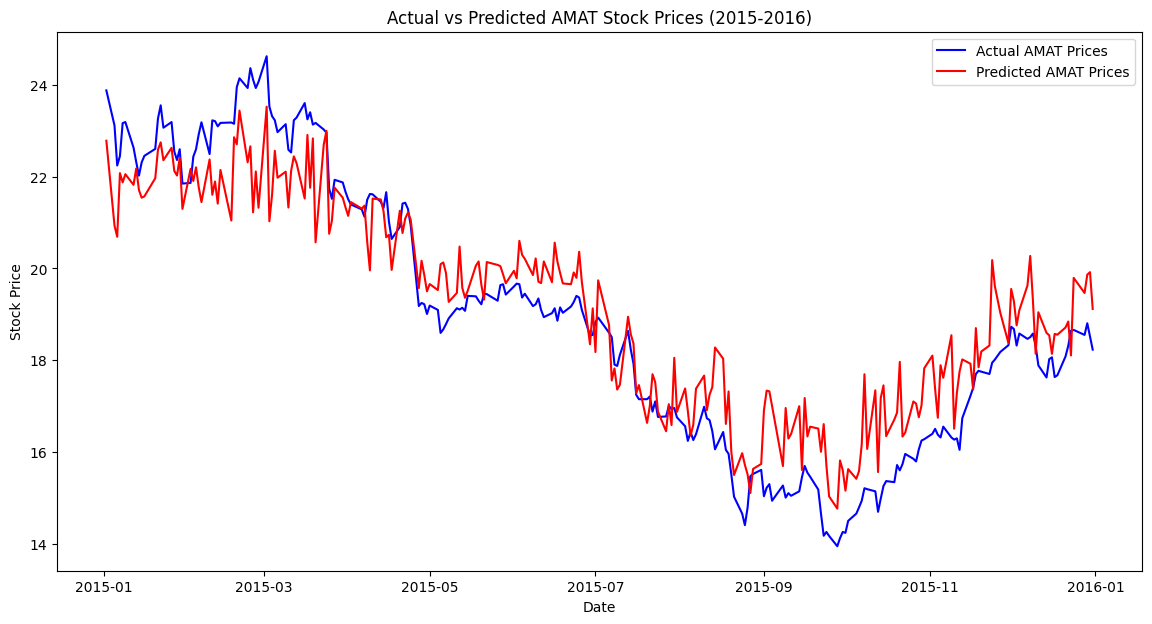

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns  # seabornをインポートする
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# from google.colab import drive

# Google Driveをマウントする
# drive.mount('/content/drive')

# ファイルパスを指定してデータを読み込む
file_amat = './amat.us.csv'
file_txn = './txn.us.csv'
data_a = pd.read_csv(file_amat)
data_t = pd.read_csv(file_txn)
# データの先頭行を確認する
print(data_a.head())
print(data_t.head())

# 日付をdatetime型に変換する
data_a['Date'] = pd.to_datetime(data_a['Date'])
data_t['Date'] = pd.to_datetime(data_t['Date'])

# 訓練期間のデータを抽出する
start_date = '2010-01-01'
end_date = '2015-12-31'
training_data_a = data_a[(data_a['Date'] >= start_date) & (data_a['Date'] <= end_date)]
training_data_t = data_t[(data_t['Date'] >= start_date) & (data_t['Date'] <= end_date)]

# テスト期間のデータを抽出する
test_start_date = '2015-01-01'
test_end_date = '2016-01-01'
test_data_a = data_a[(data_a['Date'] >= test_start_date) & (data_a['Date'] <= test_end_date)]
test_data_t = data_t[(data_t['Date'] >= test_start_date) & (data_t['Date'] <= test_end_date)]

# 1. 二つの株のラインチャートをプロットする
plt.figure(figsize=(14, 7))
plt.plot(training_data_a['Date'], training_data_a['Close'], label='AMAT', color='b')
plt.plot(training_data_t['Date'], training_data_t['Close'], label='TXN', color='r')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('AMAT vs TXN Stock Prices (2010-2015)')
plt.legend()
plt.show()

# 2. 相関関係のヒートマップをプロットする
merged_data = pd.merge(training_data_a[['Date', 'Close']], training_data_t[['Date', 'Close']], on='Date', suffixes=('_AMAT', '_TXN'))
correlation_matrix = merged_data[['Close_AMAT', 'Close_TXN']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between AMAT and TXN Stock Prices')
plt.show()

# 3. スキャタープロットを作成する
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Close_AMAT'], merged_data['Close_TXN'], alpha=0.6, c='b')
plt.xlabel('AMAT Stock Price')
plt.ylabel('TXN Stock Price')
plt.title('Scatter Plot between AMAT and TXN Stock Prices')
plt.show()

# 4. AMATの予測モデルを作成する
# 訓練データとテストデータを準備する
X_train = training_data_t[['Close', 'Volume']]
y_train = training_data_a['Close']

X_test = test_data_t[['Close', 'Volume']]
y_test = test_data_a['Close']

# ランダムフォレストモデルを訓練する
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# テストデータで予測する
y_pred = model.predict(X_test)

# モデルの精度を測定する
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 予測結果をプロットする
plt.figure(figsize=(14, 7))
plt.plot(test_data_a['Date'], y_test, label='Actual AMAT Prices', color='b')
plt.plot(test_data_a['Date'], y_pred, label='Predicted AMAT Prices', color='r')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted AMAT Stock Prices (2015-2016)')
plt.legend()
plt.show()

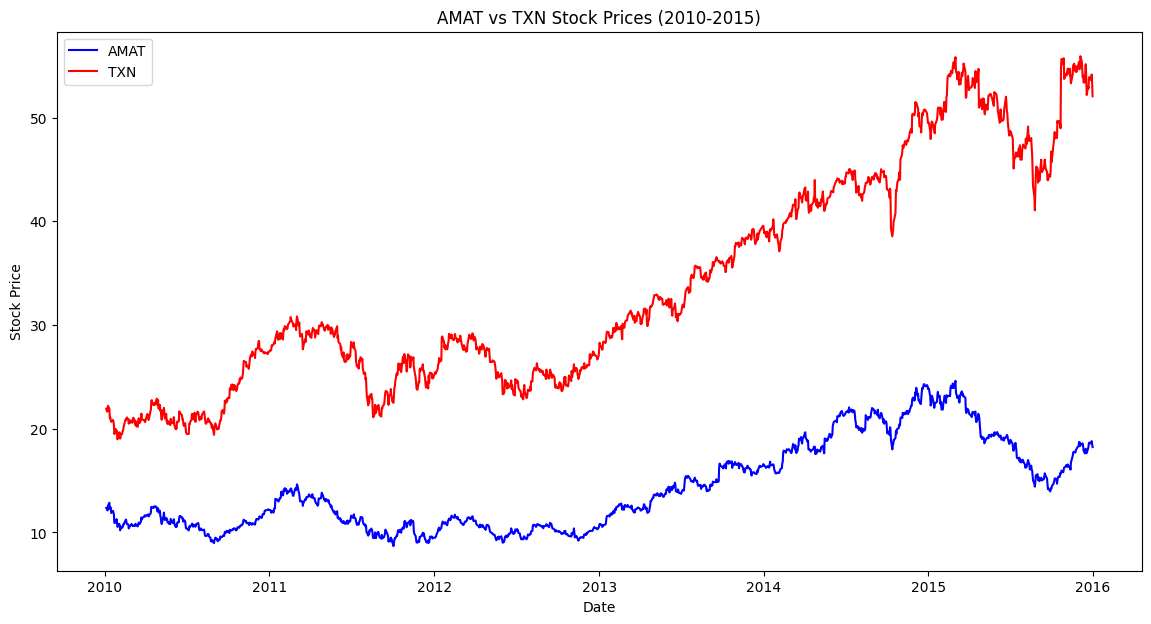

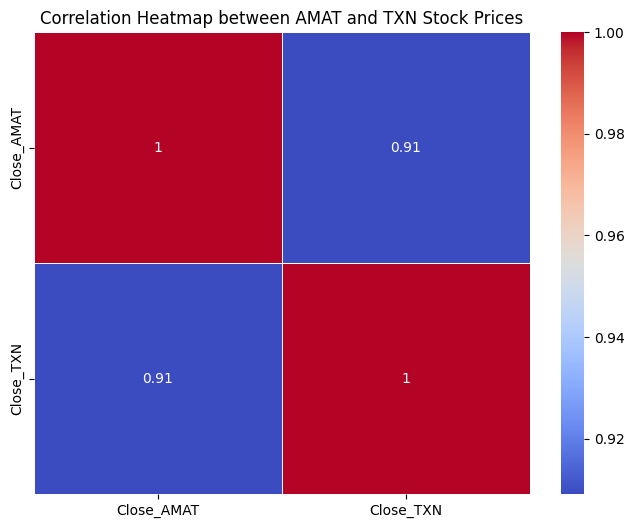

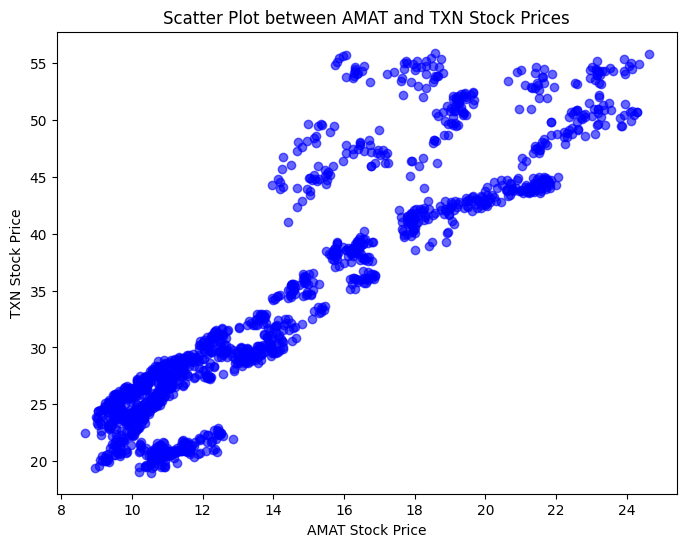

Mean Squared Error: 5.675375690516667


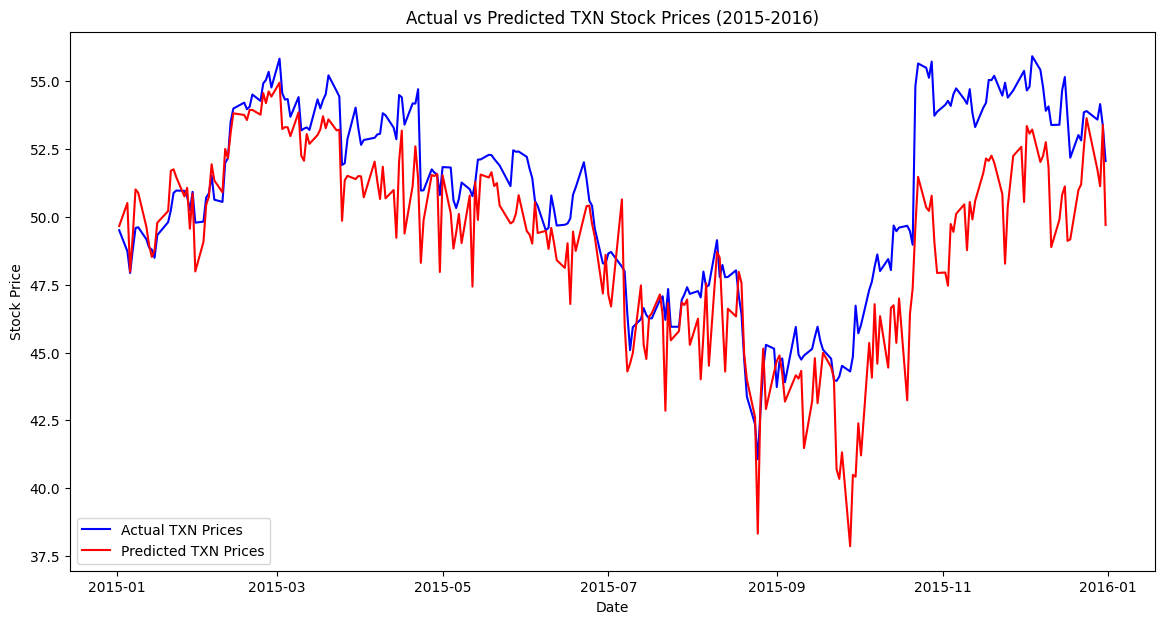

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# CSVファイルを読み込む
data_a = pd.read_csv('./amat.us.csv')  # AMATのデータファイルパスを設定する
data_t = pd.read_csv('./txn.us.csv')   # TXNのデータファイルパスを設定する

# 日付をdatetime型に変換する
data_a['Date'] = pd.to_datetime(data_a['Date'])
data_t['Date'] = pd.to_datetime(data_t['Date'])

# 訓練期間のデータを抽出する
start_date = '2010-01-01'
end_date = '2015-12-31'
training_data_a = data_a[(data_a['Date'] >= start_date) & (data_a['Date'] <= end_date)]
training_data_t = data_t[(data_t['Date'] >= start_date) & (data_t['Date'] <= end_date)]

# テスト期間のデータを抽出する
test_start_date = '2015-01-01'
test_end_date = '2016-01-01'
test_data_a = data_a[(data_a['Date'] >= test_start_date) & (data_a['Date'] <= test_end_date)]
test_data_t = data_t[(data_t['Date'] >= test_start_date) & (data_t['Date'] <= test_end_date)]

# 1. 二つの株のラインチャートをプロットする
plt.figure(figsize=(14, 7))
plt.plot(training_data_a['Date'], training_data_a['Close'], label='AMAT', color='b')
plt.plot(training_data_t['Date'], training_data_t['Close'], label='TXN', color='r')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('AMAT vs TXN Stock Prices (2010-2015)')
plt.legend()
plt.show()

# 2. 相関関係のヒートマップをプロットする
merged_data = pd.merge(training_data_a[['Date', 'Close']], training_data_t[['Date', 'Close']], on='Date', suffixes=('_AMAT', '_TXN'))
correlation_matrix = merged_data[['Close_AMAT', 'Close_TXN']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between AMAT and TXN Stock Prices')
plt.show()

# 3. スキャタープロットを作成する
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Close_AMAT'], merged_data['Close_TXN'], alpha=0.6, c='b')
plt.xlabel('AMAT Stock Price')
plt.ylabel('TXN Stock Price')
plt.title('Scatter Plot between AMAT and TXN Stock Prices')
plt.show()

# 4. TXNの予測モデルを作成する
# 訓練データとテストデータを準備する
X_train = training_data_a[['Close', 'Volume']]
y_train = training_data_t['Close']

X_test = test_data_a[['Close', 'Volume']]
y_test = test_data_t['Close']

# ランダムフォレストモデルを訓練する
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# テストデータで予測する
y_pred = model.predict(X_test)

# モデルの精度を測定する
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 予測結果をプロットする
plt.figure(figsize=(14, 7))
plt.plot(test_data_t['Date'], y_test, label='Actual TXN Prices', color='b')
plt.plot(test_data_t['Date'], y_pred, label='Predicted TXN Prices', color='r')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted TXN Stock Prices (2015-2016)')
plt.legend()
plt.show()
